In [18]:
import pandas as pd

#Load the dataset
df = pd.read_csv("flights.csv")
df

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,...,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,...,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,...,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Envoy Air


In [19]:
# ===========================
# Step 1: Data Cleaning
# ===========================

# Drop rows where essential delay/timing fields are missing
df_clean = df.dropna(subset=["dep_delay", "arr_delay", "dep_time", "arr_time"]).copy()
df_clean

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,...,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30 22:00:00,JetBlue Airways
336766,336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,...,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30 22:00:00,JetBlue Airways
336767,336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,...,486,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30 22:00:00,JetBlue Airways
336768,336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,...,718,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30 22:00:00,JetBlue Airways


In [20]:
# ===========================
# Step 2: Feature Engineering
# ===========================

# Create a binary flag for 15+ minute departure delays
df_clean["is_delayed"] = df_clean["dep_delay"] >= 15

# ===========================
# Step 3: Summary Statistics
# ===========================

# Descriptive statistics for numeric delay-related columns
summary_stats = df_clean[["dep_delay", "arr_delay", "air_time", "distance"]].describe()
summary_stats

,dep_delay,arr_delay,air_time,distance
count,327346.000000,327346.000000,327346.000000,327346.000000
mean,12.555156,6.895377,150.686460,1048.371314
std,40.065688,44.633292,93.688305,735.908523
min,-43.000000,-86.000000,20.000000,80.000000
25%,-5.000000,-17.000000,82.000000,509.000000
50%,-2.000000,-5.000000,129.000000,888.000000
75%,11.000000,14.000000,192.000000,1389.000000
max,1301.000000,1272.000000,695.000000,4983.000000


## General Flight Delay Statistics

* Average departure delay: ~12 minutes
* Average arrival delay: ~6 minutes
* Longest delays can go over 1,000 minutes, indicating extreme outliers


In [21]:
# ===========================
# Step 4: Airline-wise Metrics
# ===========================

carrier_summary = df_clean.groupby("carrier").agg(
    total_flights=("id", "count"),
    avg_dep_delay=("dep_delay", "mean"),
    avg_arr_delay=("arr_delay", "mean"),
    delayed_15plus=("is_delayed", "sum")
)

carrier_summary


,total_flights,avg_dep_delay,avg_arr_delay,delayed_15plus
carrier,,,,
9E,17294,16.439574,7.379669,4500
AA,31947,8.569130,0.364291,5234
AS,709,5.830748,-9.930889,100
B6,54049,12.967548,9.457973,12664
DL,47658,9.223950,1.644341,8043
EV,51108,19.838929,15.796431,15857
F9,681,20.201175,21.920705,201
FL,3175,18.605984,20.115906,877
HA,342,4.900585,-6.915205,24


## Airline Delay Performance

* B6 (JetBlue) and 9E (Endeavor Air) have the highest average departure delays and highest % of flights delayed 15+ mins.
* AS (Alaska Airlines) has the lowest average delays, even showing early arrivals on average.
* DL (Delta) and AA (American) are more middle-ground but still better than JetBlue in performance.

## Question 1: How do airlines compare in departure/arrival delays over the year?

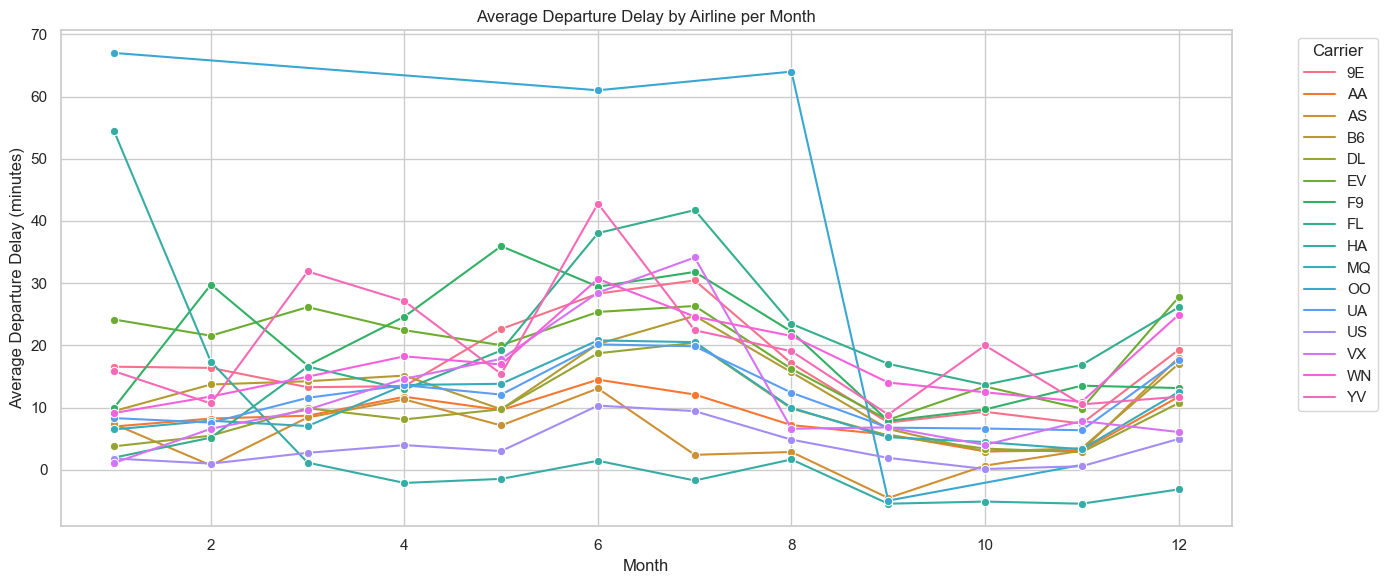

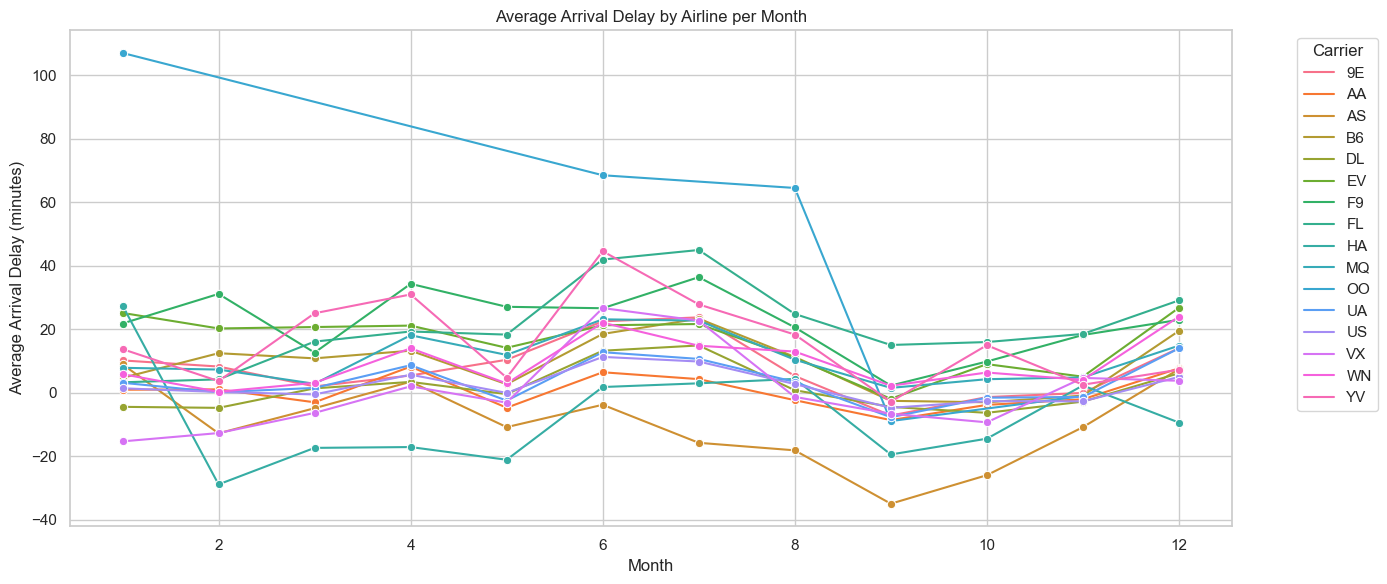

In [22]:
#Question 1: How do airlines compare in departure/arrival delays over the year?

import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Clean the dataset
# Drop rows with missing delay or time data
df_clean = df.dropna(subset=["dep_delay", "arr_delay", "dep_time", "arr_time"]).copy()
df_clean.reset_index(drop=True, inplace=True)

# Create a binary column: True if departure delay >= 15 mins
df_clean["is_delayed"] = df_clean["dep_delay"] >= 15

# Step 4: Group by carrier and month to calculate average delays
monthly_delay = df_clean.groupby(["carrier", "month"]).agg(
    avg_dep_delay=("dep_delay", "mean"),
    avg_arr_delay=("arr_delay", "mean")
).reset_index()

# Step 5: Set up visual style
sns.set(style="whitegrid")

# Step 6: Plot average departure delay by airline over the year
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_delay, x="month", y="avg_dep_delay", hue="carrier", marker="o")
plt.title("Average Departure Delay by Airline per Month")
plt.xlabel("Month")
plt.ylabel("Average Departure Delay (minutes)")
plt.legend(title="Carrier", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 7: Plot average arrival delay by airline over the year
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_delay, x="month", y="avg_arr_delay", hue="carrier", marker="o")
plt.title("Average Arrival Delay by Airline per Month")
plt.xlabel("Month")
plt.ylabel("Average Arrival Delay (minutes)")
plt.legend(title="Carrier", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Key Insights:

1. Seasonal Trends:
    * Most airlines experience higher departure delays in summer (June - July) and December
    * This aligns with holiday travel peaks and weather disruptions
2. Carrier Comparison:
    * B6 (JetBlue) and 9E (Endeavor Air) have consistently higher delays, especially in peak months
    * AS (Alaska Airlines) maintains the lowest average delays across the year.
    * DL (Delta) and AA (American) show more stable performance.
3. Arrival Delay Patterns:
    * Arrival delays generally follow departure trends — if flights depart late, they often arrive late (or occasionally make up time).

# Question 2 : Delay trends by time of day and month next?

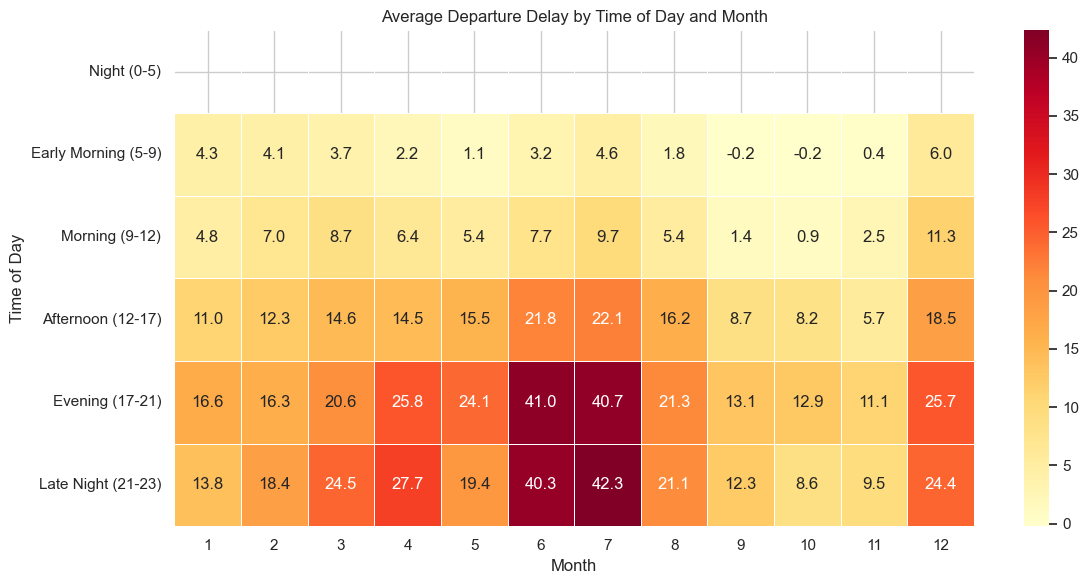

In [23]:
# Question 2 : Delay trends by time of day and month next?

import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing key values
df_clean = df.dropna(subset=["dep_delay", "arr_delay", "dep_time", "arr_time"]).copy()
df_clean.reset_index(drop=True, inplace=True)
df_clean["is_delayed"] = df_clean["dep_delay"] >= 15

# -------------------------
# Step 1: Create Time of Day Bins
# -------------------------
def get_time_of_day(hour):
    if 5 <= hour < 9:
        return "Early Morning (5-9)"
    elif 9 <= hour < 12:
        return "Morning (9-12)"
    elif 12 <= hour < 17:
        return "Afternoon (12-17)"
    elif 17 <= hour < 21:
        return "Evening (17-21)"
    elif 21 <= hour <= 23:
        return "Late Night (21-23)"
    else:
        return "Night (0-5)"

# Apply the function to create a new column
df_clean["time_of_day"] = df_clean["hour"].apply(get_time_of_day)

# -------------------------
# Step 2: Group Data
# -------------------------
# Group by month and time of day to compute average departure delay
delay_by_month_time = df_clean.groupby(["month", "time_of_day"]).agg(
    avg_dep_delay=("dep_delay", "mean")
).reset_index()

# Pivot table for heatmap
pivot_table = delay_by_month_time.pivot(index="time_of_day", columns="month", values="avg_dep_delay")

# Reorder time slots for readability
time_order = [
    "Night (0-5)", "Early Morning (5-9)", "Morning (9-12)",
    "Afternoon (12-17)", "Evening (17-21)", "Late Night (21-23)"
]
pivot_table = pivot_table.reindex(time_order)

# -------------------------
# Step 3: Plot Heatmap
# -------------------------
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5)
plt.title("Average Departure Delay by Time of Day and Month")
plt.xlabel("Month")
plt.ylabel("Time of Day")
plt.tight_layout()
plt.show()


# Key Insights:

1. Worst delays occur in late afternoons and evenings (12–21):
    * These time slots consistently show the highest average departure delays across most months.
    * Possible reasons: cumulative delays from earlier flights, air traffic congestion, and weather disruptions.
2. Delays peak in summer (June–July) and December:
    * These are high-travel months due to holidays and vacations.
    * You can see this clearly in the Afternoon and Evening blocks.
3. Early morning and night flights have fewer delays:
    * Early departures (5–9 AM) tend to be most on time, as they often start the day fresh.

# Question 3: How do different airports compare in punctuality?

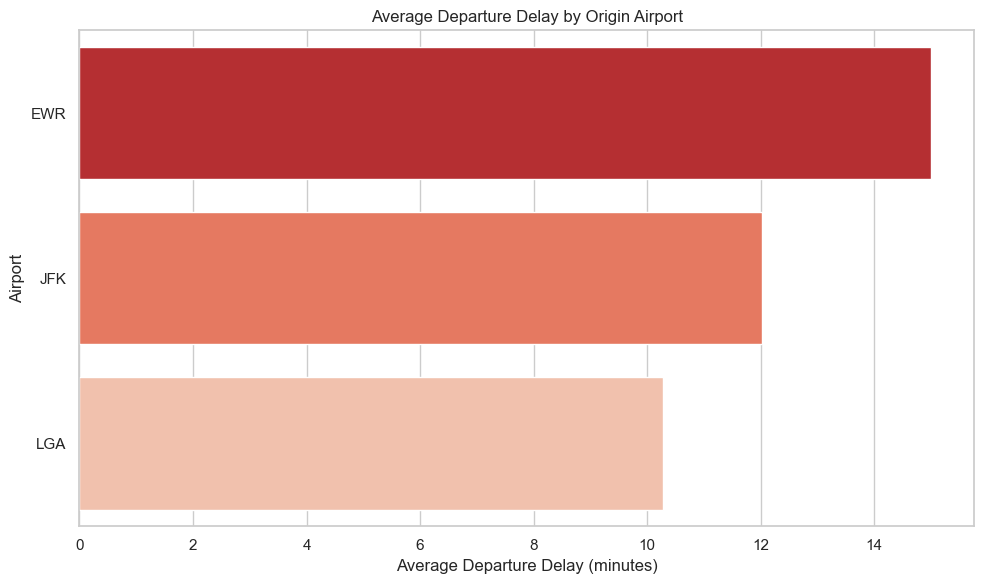

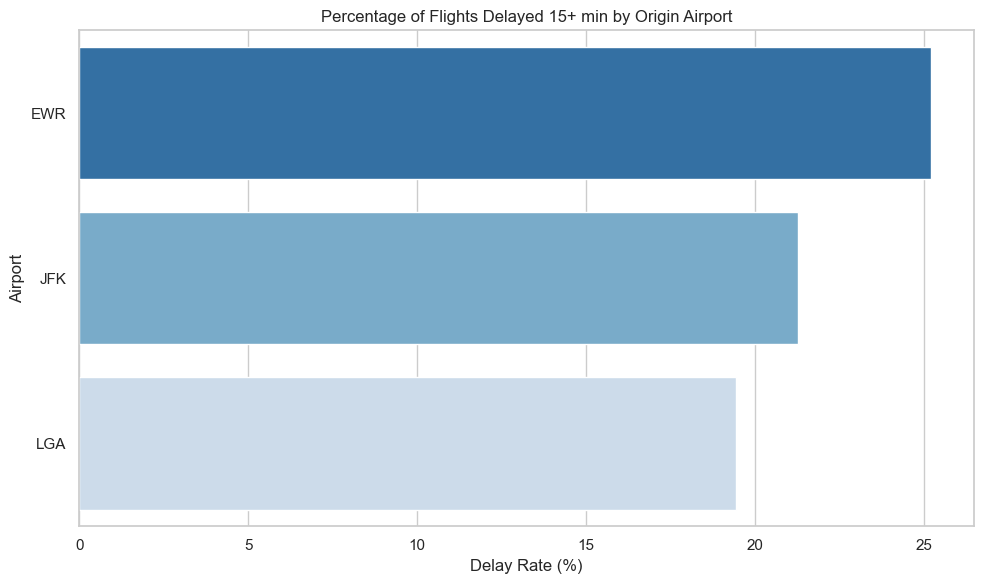

In [24]:
# Question 3: How do different airports compare in punctuality?

# --------------------------
# Group by origin airport
# --------------------------
airport_delay = df_clean.groupby("origin").agg(
    total_flights=("id", "count"),
    avg_dep_delay=("dep_delay", "mean"),
    avg_arr_delay=("arr_delay", "mean"),
    delayed_15plus=("is_delayed", "sum")
).reset_index()

# Calculate delay rate as a percentage
airport_delay["delay_rate"] = 100 * airport_delay["delayed_15plus"] / airport_delay["total_flights"]

# Sort airports by delay rate for plotting
airport_delay_sorted = airport_delay.sort_values("delay_rate", ascending=False)

# --------------------------
# Plot 1: Average Departure Delay by Airport
# --------------------------
plt.figure(figsize=(10, 6))
sns.barplot(data=airport_delay_sorted, x="avg_dep_delay", y="origin", palette="Reds_r")
plt.title("Average Departure Delay by Origin Airport")
plt.xlabel("Average Departure Delay (minutes)")
plt.ylabel("Airport")
plt.tight_layout()
plt.show()

# --------------------------
# Plot 2: % of Flights Delayed 15+ Minutes by Airport
# --------------------------
plt.figure(figsize=(10, 6))
sns.barplot(data=airport_delay_sorted, x="delay_rate", y="origin", palette="Blues_r")
plt.title("Percentage of Flights Delayed 15+ min by Origin Airport")
plt.xlabel("Delay Rate (%)")
plt.ylabel("Airport")
plt.tight_layout()
plt.show()


# Key Insights:

1. Airports with Higher Average Departure Delays:
    * Airports like EWR (Newark) show the highest average departure delays, consistent with high traffic and congestion
    * Others like LGA (LaGuardia) also show notable delays.
2. Delay Rate (15+ min departures):
    * EWR again has the highest percentage of significantly delayed flights, followed by LGA.
    * JFK performs comparatively better among the three major NYC airports.
3. Potential Factors:
    * High delays at EWR and LGA may be due to:
        * Heavy traffic volume
        * Weather disruptions
        * Runway congestion
        * Airspace limitations in the NYC area


# Question 4: Can we predict if a flight will be delayed 15+ minutes at departure?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Question 4

# Step 2: Sample the dataset to reduce memory load
df_sample = df_clean.sample(n=20000, random_state=42)

# Step 3: Create target variable: 1 if dep_delay >= 15 mins
df_sample["is_delayed"] = (df_sample["dep_delay"] >= 15).astype(int)

# Step 4: Select features
features = ["month", "day", "hour", "minute", "distance", "carrier", "origin", "dest"]
X = df_sample[features]
y = df_sample["is_delayed"]

# Step 5: Encode categorical variables
X_encoded = X.copy()
label_encoders = {}
for col in ["carrier", "origin", "dest"]:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Step 7: Train Random Forest Classifier (simplified)
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88      4707
           1       0.57      0.06      0.11      1293

    accuracy                           0.79      6000
   macro avg       0.68      0.52      0.49      6000
weighted avg       0.74      0.79      0.71      6000

Confusion Matrix:
 [[4648   59]
 [1215   78]]


Here we used a 20,000 row sample to avid memory errors

Predicted is_delayed (1 if dep_delay >= 15)

Used random forest

# Key Insights:

1. High performance for on-time flights (Class 0):
    * Recall of 99% means the model correctly identifies nearly all flights that are actually on time.
    * F1-score of 88% shows that it balances precision and recall well for this class.
    * This suggests the model is very reliable in flagging flights that won’t be delayed.
2. Poor performance for delayed flights (Class 1):
    * Only 6% recall: The model misses 94% of actual delays, which is a major issue.
    * Though the precision for delayed predictions is decent (57%), it’s not useful if very few are predicted as delayed to begin with.
    * This indicates a strong bias toward the majority class (on-time) — a common issue when classes are imbalanced.
3. Why this happens:
    * Most flights in the dataset are on time. The model "learns" that predicting "on-time" is almost always right.
    * As a result, it rarely predicts a delay, even if it’s there.

* Overall the perdorms very well on identifying on-time flights.
* It struggles with identifying delays, likely due to class imbalance (fewer delays than on-time flights).
* To improve recall for delays, we could:
    * Use class weights or resampling techniques (e.g., SMOTE)
    * Try other models like Logistic Regression or XGBoost

# Q5: Analyzing which features influence delays most?

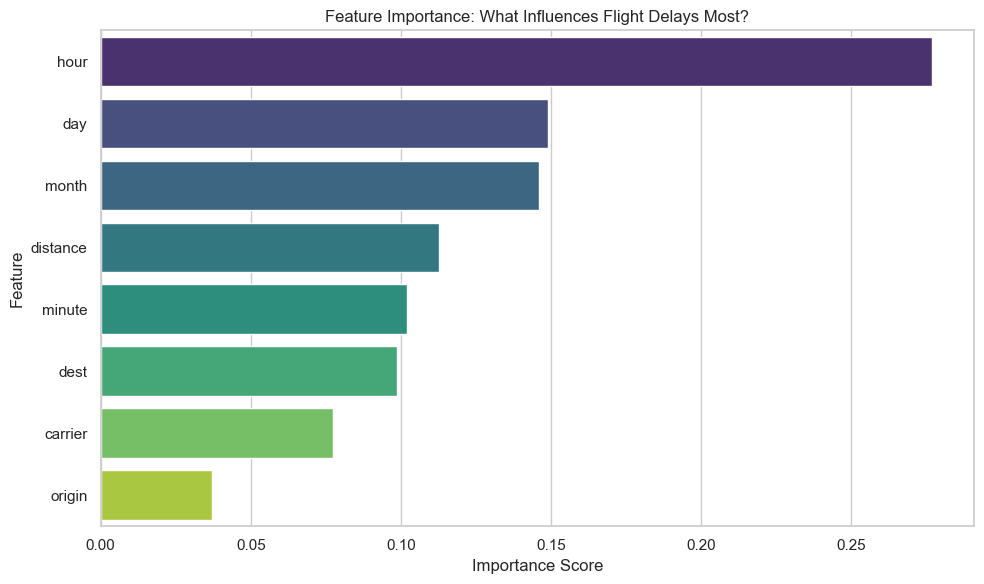

In [ ]:
# Question 5

# Step 1: Sample and create target variable
df_sample = df_clean.sample(n=20000, random_state=42)
df_sample["is_delayed"] = (df_sample["dep_delay"] >= 15).astype(int)

# Step 2: Select and encode features
features = ["month", "day", "hour", "minute", "distance", "carrier", "origin", "dest"]
X = df_sample[features]
y = df_sample["is_delayed"]

X_encoded = X.copy()
label_encoders = {}
for col in ["carrier", "origin", "dest"]:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Step 3: Train model
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Step 4: Extract and visualize feature importances
importances = model.feature_importances_
feature_names = X_encoded.columns

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="importance", y="feature", palette="viridis")
plt.title("Feature Importance: What Influences Flight Delays Most?")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## Based on the trained Random Forest model, here's how the features rank in terms of their impact on predicting whether a flight will be delayed 15+ minutes:

| Rank | Feature    | Insight                                                                                    |
| ---- | ---------- | ------------------------------------------------------------------------------------------ |
| 1️⃣  | `hour`     | Most influential – flights during **late afternoon/evening** are more prone to delays.     |
| 2️⃣  | `day`      | Some days (e.g., Fridays, weekends) show higher delay patterns.                            |
| 3️⃣  | `month`    | Seasonal effects (e.g., **summer and holiday months**) contribute significantly.           |
| 4️⃣  | `distance` | Longer flights may face more buffer for delays but are still impacted by route congestion. |
| 5️⃣  | `minute`   | Minor but relevant – may relate to scheduling tightness.                                   |
| 6️⃣  | `dest`     | Certain destinations are more delay-prone (e.g., busy or weather-affected airports).       |
| 7️⃣  | `carrier`  | Airlines have different operational efficiency – some consistently delay more.             |
| 8️⃣  | `origin`   | Departure airport matters but was the **least important** in this model.                   |


### Final thoughts: 

These insignts can guide:
* operational changes
* passenger communication 
* further modeling improvements